## WORKSHOP-5:License Plate Detection using OpenCV and Haar Cascade
## Name: MOHAMMAD FAIZAL SK

## Title: Detects license plates using Haar cascades and applies improvements for better accuracy.


In [1]:
import os
print(os.getcwd())  # Shows your current working directory
print(os.listdir()) # Lists files in that folder


C:\Users\admin\Downloads\workshop5
['.ipynb_checkpoints', 'car.jpg', 'haarcascade_russian_plate_number.xml', 'Workshop5.ipynb']


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


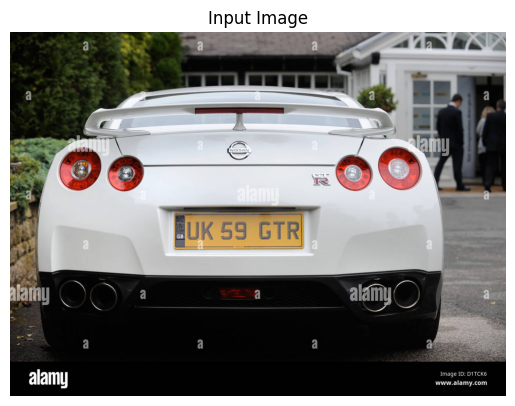

In [3]:
# Read input image
img = cv2.imread('car.jpg')

# Convert BGR → RGB for matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title('Input Image')
plt.axis('off')
plt.show()


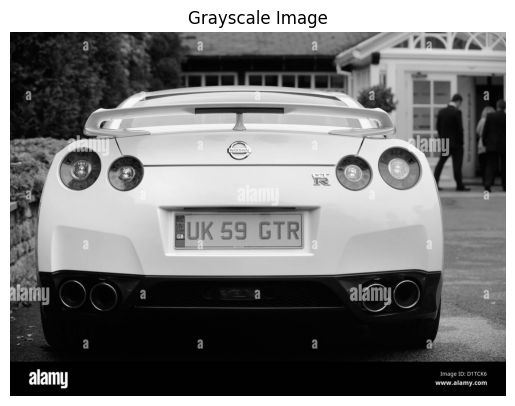

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()


In [5]:
# Load pre-trained Haar Cascade
plate_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

# Detect license plates
plates = plate_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

print(f"Detected {len(plates)} plates.")


Detected 1 plates.


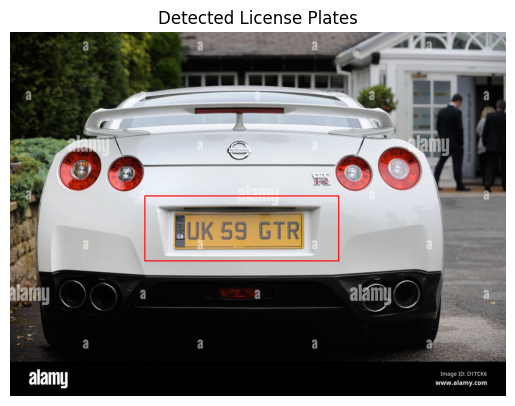

In [6]:
for (x, y, w, h) in plates:
    cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (255, 0, 0), 2)

plt.imshow(img_rgb)
plt.title('Detected License Plates')
plt.axis('off')
plt.show()


In [7]:
for i, (x, y, w, h) in enumerate(plates):
    plate_roi = gray[y:y+h, x:x+w]
    cv2.imwrite(f"plate_{i+1}.png", plate_roi)


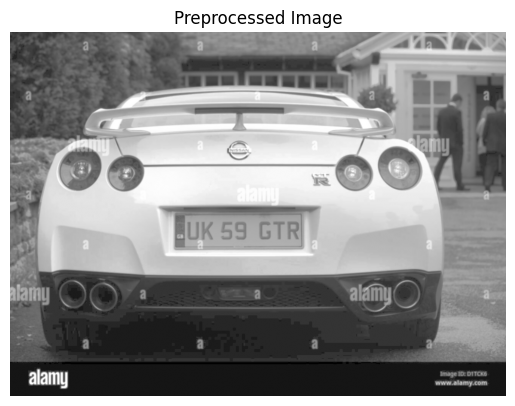

Plates detected after preprocessing: 5


In [8]:
blurred = cv2.GaussianBlur(gray, (5,5), 0)
equalized = cv2.equalizeHist(blurred)

plt.imshow(equalized, cmap='gray')
plt.title('Preprocessed Image')
plt.axis('off')
plt.show()

plates_improved = plate_cascade.detectMultiScale(equalized, scaleFactor=1.1, minNeighbors=4)
print(f"Plates detected after preprocessing: {len(plates_improved)}")


In [9]:
for i, (x, y, w, h) in enumerate(plates):
    plate_roi = gray[y:y+h, x:x+w]
    cv2.imwrite(f"plate_{i+1}.png", plate_roi)


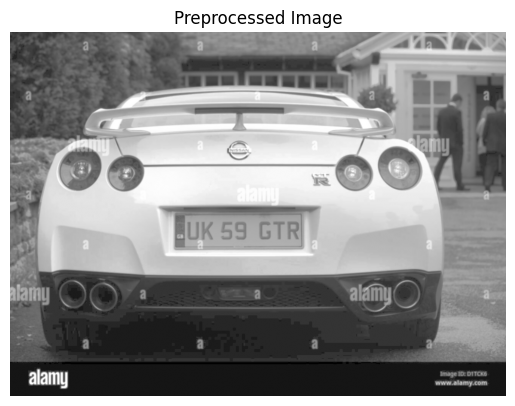

Plates detected after preprocessing: 5


In [10]:
blurred = cv2.GaussianBlur(gray, (5,5), 0)
equalized = cv2.equalizeHist(blurred)

plt.imshow(equalized, cmap='gray')
plt.title('Preprocessed Image')
plt.axis('off')
plt.show()

plates_improved = plate_cascade.detectMultiScale(equalized, scaleFactor=1.1, minNeighbors=4)
print(f"Plates detected after preprocessing: {len(plates_improved)}")


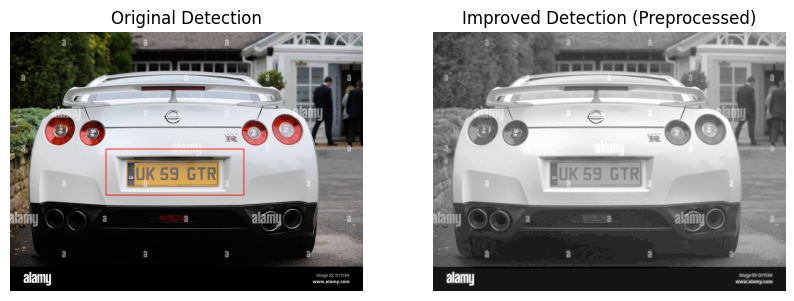

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].imshow(img_rgb)
axs[0].set_title('Original Detection')
axs[1].imshow(equalized, cmap='gray')
axs[1].set_title('Improved Detection (Preprocessed)')
for ax in axs: ax.axis('off')
plt.show()
